# Project Using K-Means on Pantheon Dataset - PART TWO

In [1]:
library(ggplot2)
library(ggmap)
library(maps)
library(maptools)
library(RgoogleMaps)
library(sp)

Loading required package: sp
Checking rgeos availability: TRUE


Load the data from the python notebook and start doing your analysis.  

In [2]:
pan = read.csv("../../../modules/module/Practices/new_pan_data.csv")
head(pan)
str(pan)
summary(pan)

Warning message in file(file, "rt"):
“cannot open file '../../../modules/module/Practices/new_pan_data.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


Let's see if we notice any differences in the major Industries by cluster. 

It seems there are a lot more data points in cluster 1.  There's a lot going on here, which might suggest that we should have broken this out differently in more clusters.  At this point cluster 1 seems to dominate many industries.  

In [3]:
ggplot(data=pan, aes(industry)) + 
  geom_bar() + facet_wrap(~ cluster)

ERROR: Error in ggplot(data = pan, aes(industry)): object 'pan' not found


Let's map these clusters to see if we notice any patterns.  We'll map different regions of the world.  

In [4]:

library(ggmap)
map <- get_map(location = 'United States', zoom = )
newmap0 <- ggmap(map) + geom_point(data = pan, aes(x = longitude, y = latitude, color=factor(cluster)))
newmap0

library(ggmap)
map <- get_map(location = 'Europe', zoom = )
newmap1 <- ggmap(map) + geom_point(data = pan, aes(x = longitude, y = latitude, color=factor(cluster)))
newmap1

library(ggmap)
map <- get_map(location = 'Africa', zoom = )
newmap2 <- ggmap(map) + geom_point(data = pan, aes(x = longitude, y = latitude, color=factor(cluster)))
newmap2

library(ggmap)
map <- get_map(location = 'Asia', zoom = )
newmap <- ggmap(map) + geom_point(data = pan, aes(x = longitude, y = latitude, color=factor(cluster)))
newmap


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=United+States&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false


ERROR: Error in fortify(data): object 'pan' not found


Let's look at the clusters in more detail.  Here we'll look at the top occuapations by cluster to see if any patterns or themes emerge. 

In [5]:
clust1 <- pan[pan$cluster == 0,]
clust2 <- pan[pan$cluster == 1,]
clust <- pan[pan$cluster == 2,]
clust4 <- pan[pan$cluster == ,]
clust5 <- pan[pan$cluster == 4,]
clust6 <- pan[pan$cluster == 5,]
clust7 <- pan[pan$cluster == 6,]
clust8 <- pan[pan$cluster == 7,]
summary(clust1)
summary(clust2)
summary(clust)
summary(clust4)
summary(clust5)
summary(clust6)
summary(clust7)
summary(clust8)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:30: unexpected ','
3: clust <- pan[pan$cluster == 2,]
4: clust4 <- pan[pan$cluster == ,
                                ^


In [7]:
# take the top 5 occupations by region 

library(plyr)
c1_sub <- count(clust1, 'occupation')
c1_sub <- c1_sub[c1_sub$freq >= 164,]
c1_sub

c2_sub <- count(clust2, 'occupation')
c2_sub <- c2_sub[c2_sub$freq >= 58,]
c2_sub

c_sub <- count(clust, 'occupation')
c_sub <- c_sub[c_sub$freq >= 19,]
c_sub

c4_sub <- count(clust4, 'occupation')
c4_sub <- c4_sub[c4_sub$freq >= 48,]
c4_sub

c5_sub <- count(clust5, 'occupation')
c5_sub <- c5_sub[c5_sub$freq >= 7,]
c5_sub

# This region includes Austrlia - which has 
c6_sub <- count(clust6, 'occupation')
c6_sub <- c6_sub[c6_sub$freq >= 6,]
c6_sub

c7_sub <- count(clust7, 'occupation')
c7_sub <- c7_sub[c7_sub$freq >= 15,]
c7_sub

c8_sub <- count(clust8, 'occupation')
c8_sub <- c8_sub[c8_sub$freq >= 4,]
c8_sub


Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone



,occupation,freq
1,Actor,314
20,Composer,164
62,Politician,891
70,Religious Figure,312
76,Soccer Player,635
83,Writer,485


,occupation,freq
1,Actor,542
15,Chemist,58
47,Musician,119
55,Politician,163
63,Singer,156
72,Writer,142


,occupation,freq
1,Actor,45
36,Military Personnel,19
42,Philosopher,21
46,Politician,174
54,Social Activist,19
58,Writer,37


,occupation,freq
46,Philosopher,59
52,Politician,537
58,Religious Figure,95
60,Singer,48
62,Soccer Player,95
67,Writer,178


,occupation,freq
1,Actor,25
20,Politician,11
23,Racecar Driver,7
24,Singer,8
25,Soccer Player,15
27,Tennis Player,9


,occupation,freq
7,Coach,6
19,Politician,69
21,Racecar Driver,8
24,Singer,6
25,Soccer Player,164
28,Tennis Player,13
29,Writer,17


,occupation,freq
1,Actor,205
24,Film Director,15
31,Musician,43
39,Politician,30
44,Singer,38
52,Writer,17


,occupation,freq
1,Actor,4
3,Athlete,10
17,Politician,103
20,Singer,4
21,Soccer Player,63
22,Social Activist,6
26,Writer,10


In [6]:
# mapping occupations for Cluster 1

library(plyr)
map <- get_map(location = 'Europe', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 0 & occupation == 'Actor' | occupation == 'Composer' | occupation == 'Religious Figure' | occupation == 'Soccer Player'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Soccer, Religion, Music and Acting Stand out in W. Europe as Top Occupations for Cluster 1')

newmap



Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Europe&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Europe&sensor=false


ERROR: Error in subset(pan, cluster == 0 & occupation == "Actor" | occupation == : object 'pan' not found


In [7]:
# mapping occupations for Cluster 2 

library(plyr)
map <- get_map(location = 'United States', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 1 & occupation == 'Actor' | occupation == 'Chemist' | occupation == 'Musician' | occupation == 'Singer'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Science and Entertainment stand out for Eastern U.S. as Top Occupations for Cluster 2')

newmap


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=United+States&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false


ERROR: Error in subset(pan, cluster == 1 & occupation == "Actor" | occupation == : object 'pan' not found


In [8]:
# mapping occupations for Cluster  
library(plyr)
map <- get_map(location = 'Asia', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 2 & occupation == 'Military Personnel' | occupation == 'Social Activist' | occupation == 'Philosopher'), aes(x = longitude, y = latitude, color=occupation)) +
    ggtitle('Military and Social Activists Stand Out for Top Occupations for Cluster ')

newmap




Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Asia&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Asia&sensor=false


ERROR: Error in subset(pan, cluster == 2 & occupation == "Military Personnel" | : object 'pan' not found


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Turkey&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Turkey&sensor=false
Warning message:
“Removed 237 rows containing missing values (geom_point).”

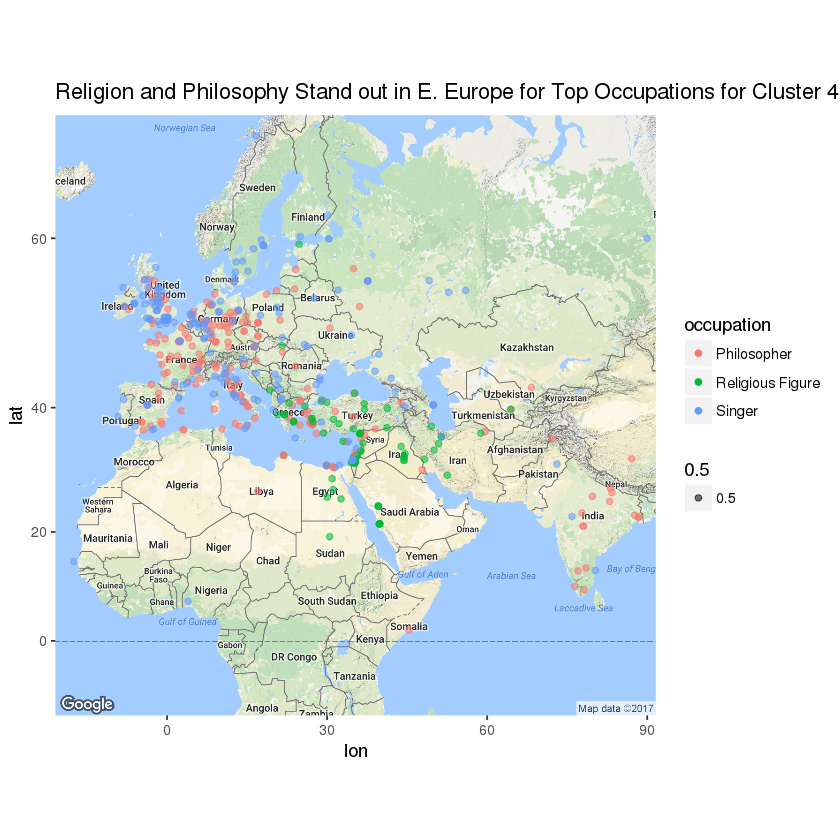

In [49]:
# mapping occupations for Cluster 4
library(plyr)
map <- get_map(location = 'Turkey', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster ==  & occupation == 'Religious Figure' | occupation == 'Singer' | occupation == 'Philosopher'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Religion and Philosophy Stand out in E. Europe for Top Occupations for Cluster 4')

newmap




Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Australia&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Australia&sensor=false
Warning message:
“Removed 148 rows containing missing values (geom_point).”

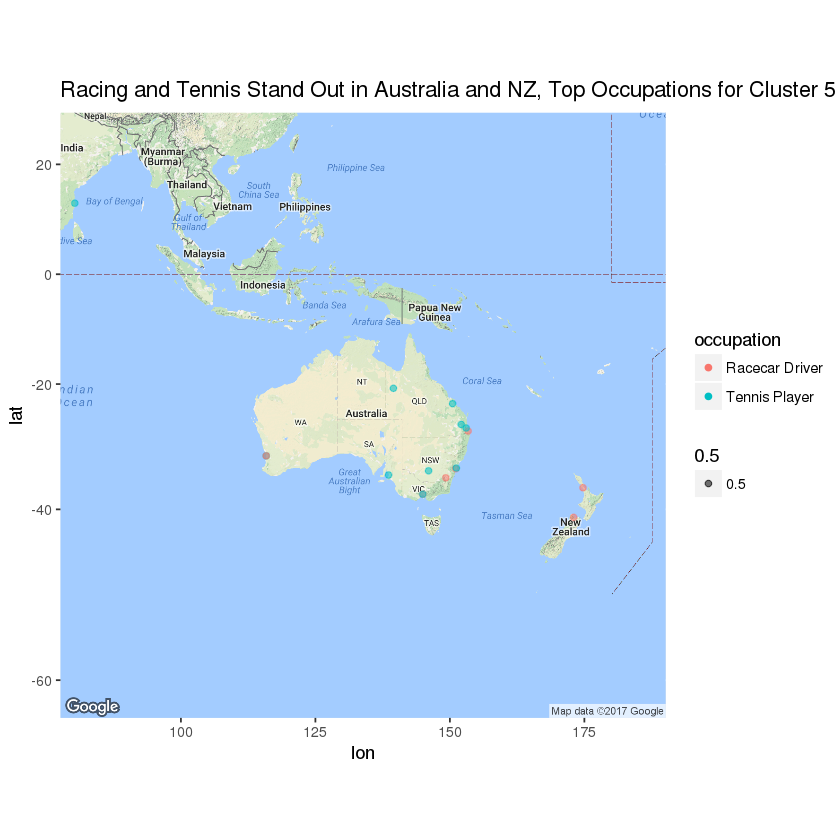

In [44]:
# mapping occupations for Cluster 5
library(plyr)
map <- get_map(location = 'Australia', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 4 & occupation == 'Racecar Driver' | occupation == 'Tennis Player'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Racing and Tennis Stand Out in Australia and NZ, Top Occupations for Cluster 5')

newmap



Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Brazil&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brazil&sensor=false
Warning message:
“Removed 986 rows containing missing values (geom_point).”

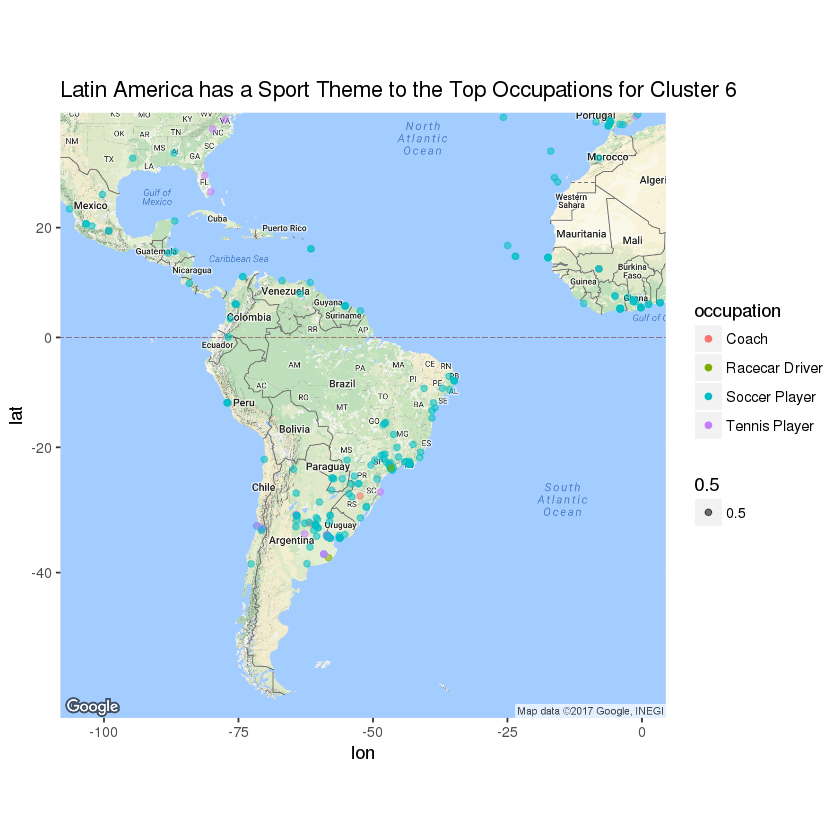

In [43]:
# mapping occupations for Cluster 6
library(plyr)
map <- get_map(location = 'Brazil', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 5 & occupation == 'Racecar Driver' | occupation == 'Tennis Player' | occupation == 'Coach' | occupation == 'Soccer Player'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Latin America has a Sport Theme to the Top Occupations for Cluster 6')

newmap



Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Mexico&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico&sensor=false
Warning message:
“Removed 1043 rows containing missing values (geom_point).”

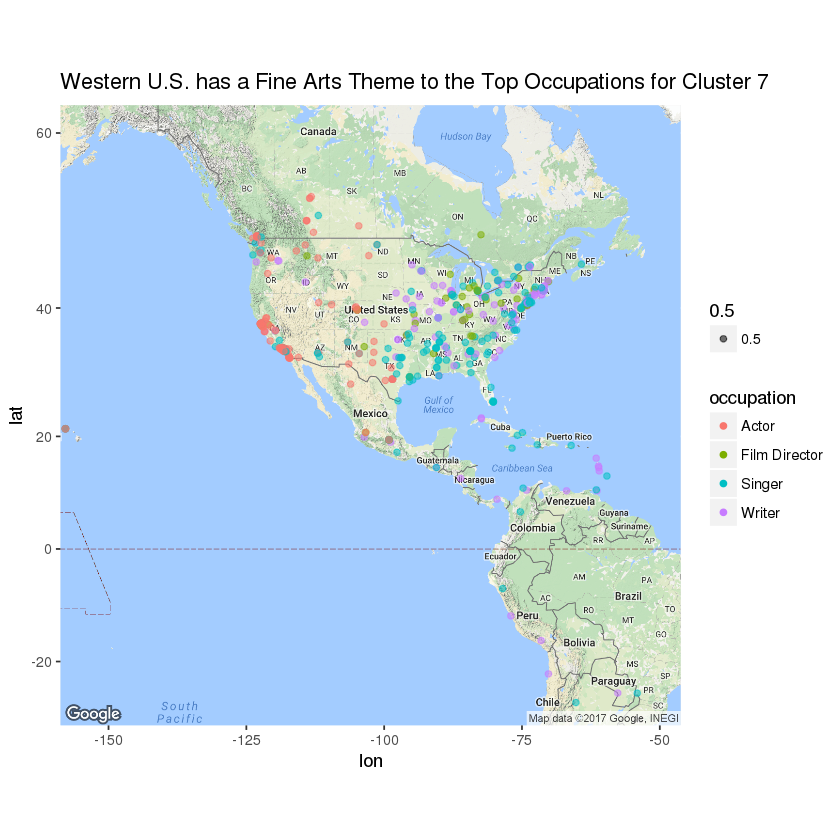

In [42]:
# mapping occupations for Cluster 7
library(plyr)
map <- get_map(location = 'Mexico', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 6 & occupation == 'Actor' | occupation == 'Film Director' | occupation == 'Singer' | occupation == 'Writer'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Western U.S. has a Fine Arts Theme to the Top Occupations for Cluster 7')

newmap



Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=South+Africa&zoom=3&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20Africa&sensor=false
Warning message:
“Removed 1518 rows containing missing values (geom_point).”

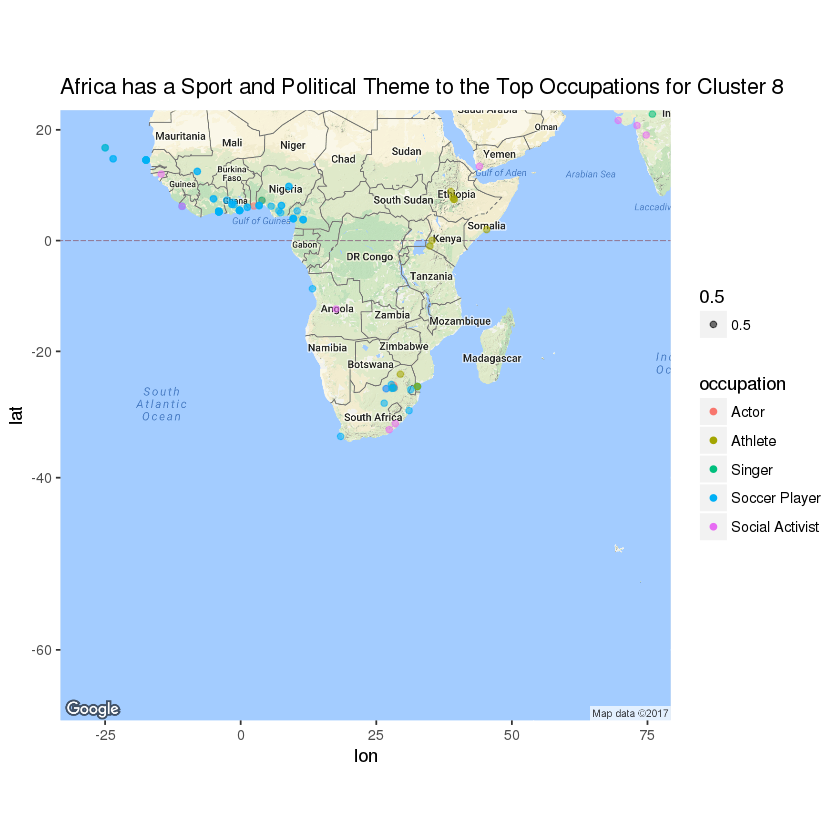

In [52]:
# mapping occupations for Cluster 8
library(plyr)
map <- get_map(location = 'South Africa', zoom = )
newmap <- ggmap(map) + geom_point(data = subset(pan, cluster == 7 & occupation == 'Actor' | occupation == 'Athlete' | occupation == 'Soccer Player' | occupation == 'Singer' | occupation == 'Social Activist'), aes(x = longitude, y = latitude, color=occupation, alpha=0.5)) +
    ggtitle('Africa has a Sport and Political Theme to the Top Occupations for Cluster 8')

newmap



After my analysis, I believe we should go back and remove some outliers.  It seem some occupations are popular no matter which region of the world we're looking at.  For example politicians, writers, and actors.  Some of these are relevant in certain instances where there is a clear fine arts theme, but I believe if we wanted to use these clusters to target specific occupations we might want to eliminate some of those records and focus on the occcupations that are more unique to each region.  Also - I'm not sure how to exactly handle the U